In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

In [2]:
print("electronics recommendation system")
print("=" * 50)

electronics recommendation system


In [3]:
#load the dataset 
print("loading electronics dataset...")
try:
    # Amazon dataset typically has columns: userId, productId, Rating, timestamp
    df = pd.read_csv('../data/raw/ratings_Electronics.csv')
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
except FileNotFoundError:
    print(" Dataset not found. Please download ratings_Electronics.csv from Kaggle")
    print(" Link: https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings")
    exit()


loading electronics dataset...
Dataset loaded successfully!
Shape: (7824481, 4)
Columns: ['AKM1MP6P0OYPR', '0132793040', '5.0', '1365811200']


In [4]:
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
df.iloc[:, 0].nunique() # unique no. of users 
df.iloc[:,1].nunique() # unique products 
df.iloc[:, 2].min() - df.iloc[:, 2].max()

np.float64(-4.0)

In [ ]:
df.isnull().sum() # check for any missing values

AKM1MP6P0OYPR    0
0132793040       0
5.0              0
1365811200       0
dtype: int64

In [7]:
# Calculate sparsity
n_users = df.iloc[:, 0].nunique()
n_products = df.iloc[:, 1].nunique()
n_interactions = len(df)
sparsity = (1 - n_interactions / (n_users * n_products)) * 100

print(f"\n📈 Dataset Statistics:")
print(f"Number of users: {n_users:,}")
print(f"Number of products: {n_products:,}")
print(f"Number of interactions: {n_interactions:,}")
print(f"Sparsity: {sparsity:.4f}%")


📈 Dataset Statistics:
Number of users: 4,201,696
Number of products: 476,001
Number of interactions: 7,824,481
Sparsity: 99.9996%


In [8]:
# Rating distribution
print(f"\n⭐ Rating Distribution:")
rating_col = df.columns[2]  # Usually the rating column
rating_counts = df[rating_col].value_counts().sort_index()
print(rating_counts)


⭐ Rating Distribution:
5.0
1.0     901765
2.0     456322
3.0     633073
4.0    1485781
5.0    4347540
Name: count, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

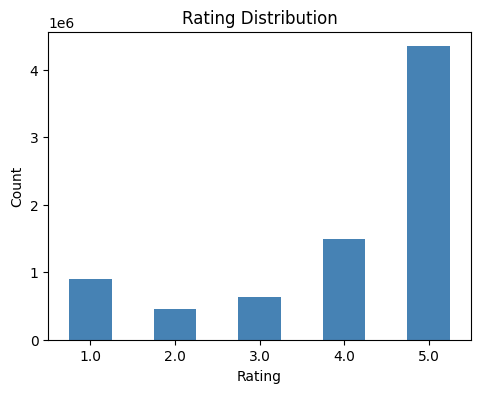

In [16]:
# plotted rating distribution

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
rating_counts.plot(kind='bar', color = 'steelblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)

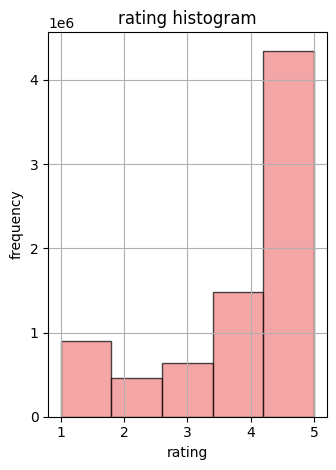

In [19]:
plt.subplot(1,2,2)
df[rating_col].hist(bins = 5 , color='lightcoral',alpha=0.7,edgecolor='black')
plt.title('rating histogram')
plt.xlabel('rating')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()

In [20]:
# top rated products 
product_stats = df.groupby(df.columns[1]).agg({
    rating_col:['mean','count']
}).round(2)

product_stats.columns = ['avg_rating','num_ratings']
top_products = product_stats[product_stats['num_ratings']>=50].sort_values('avg_rating',ascending=False)
print(top_products.head(10))

            avg_rating  num_ratings
0132793040                         
B002E6R7NG        4.98           51
B004I763AW        4.97           60
B003J9QQWU        4.96           56
B0043ZLFXE        4.96           90
B004C4VLZS        4.95           55
B000053HC5        4.95          166
B000TMFYBO        4.95           64
B00CG70K78        4.95          237
B0000DYV9H        4.95           76
B008I6RVZU        4.95          103


In [24]:
user_col = df.columns[0]
user_activity = df.groupby(user_col).size()
product_col = df.columns[1]
product_popularity = df.groupby(product_col).size()

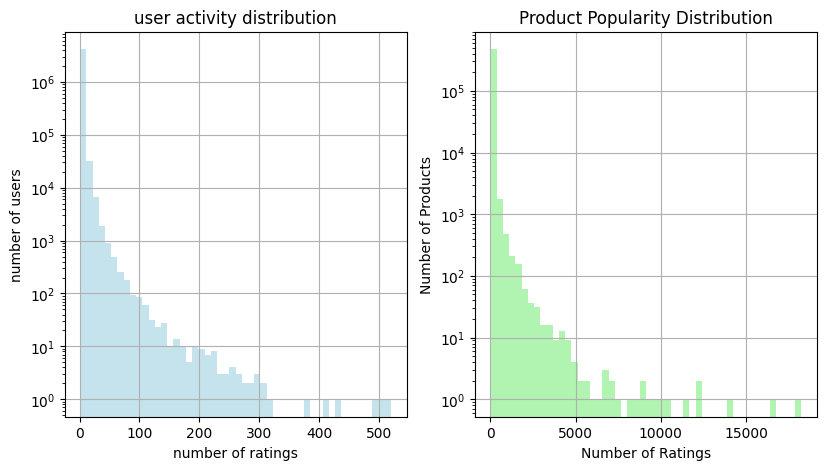

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
user_activity.hist(bins = 50,color='lightblue',alpha=0.7)
plt.title('user activity distribution')
plt.xlabel('number of ratings')
plt.ylabel('number of users')
plt.yscale('log')


plt.subplot(1, 3, 2)
product_popularity.hist(bins=50, color='lightgreen', alpha=0.7)
plt.title('Product Popularity Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Products')
plt.yscale('log')


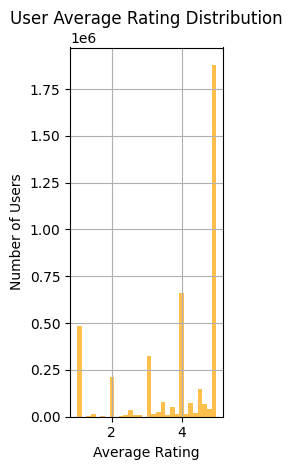


 Creating sample subset for development...
Sample dataset size: 12,572
Sample users: 995
Sample products: 946
 Sample dataset saved to data/sample/amazon_electronics_sample.csv

 Key Findings:
1. Dataset has 100.00% sparsity - typical for recommendation systems
2. Rating distribution shows user preferences
3. Many users/products have very few ratings (cold start problem)
4. Sample dataset created for faster development


In [27]:
plt.subplot(1, 3, 3)
# Average rating per user
user_avg_ratings = df.groupby(user_col)[rating_col].mean()
user_avg_ratings.hist(bins=30, color='orange', alpha=0.7)
plt.title('User Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()

# Sample subset for initial development
print(f"\n Creating sample subset for development...")
# Take top 1000 most active users and top 1000 most popular products
top_users = user_activity.nlargest(1000).index
top_products = product_popularity.nlargest(1000).index

sample_df = df[
    (df[user_col].isin(top_users)) & 
    (df[product_col].isin(top_products))
].copy()

print(f"Sample dataset size: {len(sample_df):,}")
print(f"Sample users: {sample_df[user_col].nunique():,}")
print(f"Sample products: {sample_df[product_col].nunique():,}")

# Save sample dataset
sample_df.to_csv('../data/sample/amazon_electronics_sample.csv', index=False)
print(" Sample dataset saved to data/sample/amazon_electronics_sample.csv")

print(f"\n Key Findings:")
print(f"1. Dataset has {sparsity:.2f}% sparsity - typical for recommendation systems")
print(f"2. Rating distribution shows user preferences")
print(f"3. Many users/products have very few ratings (cold start problem)")
print(f"4. Sample dataset created for faster development")

